In [1]:
from pathlib import Path

import pandas as pd

import hbsir
import table_functions

In [2]:
df = (
    hbsir.load_table("Head_Age_Range", years="80-1401")
    .assign(Count=1)
    .groupby(["Year", "Head_Birth_Year"], observed=True)["Count"]
    .count()
    .unstack()
)
df.to_excel(Path().joinpath("head_count.xlsx"))

In [2]:
YEARS = "1380-1401"

df = (
    hbsir.load_table("Total_Income", years=YEARS)
    .set_index(["Year", "ID"])
    .join(hbsir.load_table("members_properties", years=YEARS).pipe(table_functions.head_age_range, interval=7))
    .pipe(hbsir.add_weight)
    .assign(Income=lambda df: df.eval("Income * Weight"))
    .groupby(["Year", "Head_Birth_Year"], observed=True)[["Income", "Weight"]]
    .sum()
    .assign(Income=lambda df: df.eval("Income / Weight"))
    .loc[:, "Income"]
    .unstack(0)
)
df = df.subtract(df.mean()).divide(df.std())

In [3]:
df

Year,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,...,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401
Head_Birth_Year,,,,,,,,,,,,,,,,,,,,,
1278_1284,-1.062205,-1.606829,-1.721283,-1.466606,-1.516344,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1285_1291,-1.200174,-1.059520,-0.779461,-1.155420,-0.710717,-1.364325,-1.445103,-1.591852,-1.250328,-1.119077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1292_1298,-0.397291,-0.857654,-0.519224,-0.711695,-0.438425,-1.111233,-0.918245,-1.119532,-1.535259,1.476527,...,-1.504957,-1.807429,-1.322668,-1.684161,-1.889757,-1.387109,-1.840725,NaN,NaN,NaN
1299_1305,-0.258145,-0.319879,-0.456907,-0.652322,-0.507281,-0.687810,-0.620420,-0.397560,-0.417516,-0.901520,...,-0.673038,-0.610060,-0.585160,-1.245112,-0.838180,-0.389266,0.303616,-1.221052,-1.148362,-0.762161
1306_1312,0.209655,-0.074259,-0.031995,-0.087956,0.010984,-0.381448,-0.340238,-0.105804,-0.136297,-0.350978,...,-0.273961,-0.446683,-0.479677,-0.638735,-0.299141,-0.350395,-0.176273,-0.902721,-0.903743,-0.128067
1313_1319,0.655852,0.865968,0.810665,0.648310,0.469701,0.234419,0.379515,0.300339,0.504871,-0.003491,...,0.168442,-0.002196,0.188821,-0.110733,0.039091,0.307549,0.337285,0.152554,-0.271311,-0.238238
1320_1326,1.332036,1.148692,1.241539,1.288743,1.200738,1.350424,0.832096,0.969521,1.176912,0.930621,...,0.563639,0.373933,0.499466,0.414019,0.546063,0.587019,0.457047,0.450766,0.268595,0.365239
1327_1333,1.500209,1.602742,1.471561,1.560628,1.591787,1.454605,1.680753,1.405739,1.261597,1.076071,...,1.370470,1.065385,0.842913,1.063370,0.842203,0.816471,0.733260,0.592062,0.866930,0.356767
1334_1340,1.205913,1.035743,1.222659,1.191317,1.388120,1.283963,1.378931,1.385672,1.277428,1.159204,...,1.199096,1.434988,1.381922,1.355607,1.169156,1.131420,1.105842,1.154835,1.053107,0.807948


<Axes: xlabel='Head_Birth_Year'>

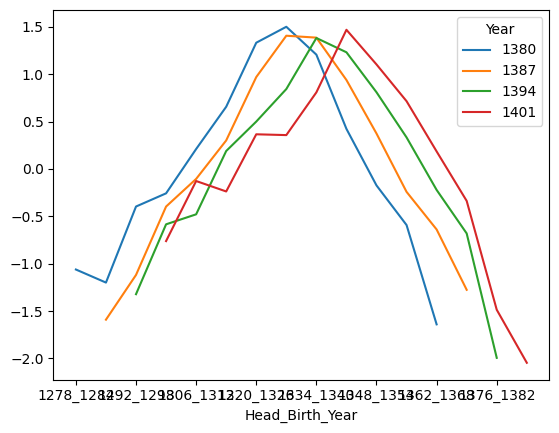

In [11]:
df[[1380, 1387, 1394, 1401]].plot()

<Axes: xlabel='Head_Birth_Year'>

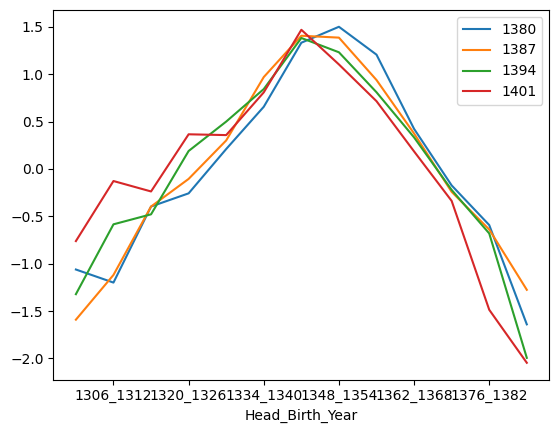

In [15]:
pd.concat(
    [
        df[1380].shift(3),
        df[1387].shift(2),
        df[1394].shift(1),
        df[1401].shift(0),
    ],
    axis="columns",
).plot()

In [6]:
hbsir.load_table("Head_Age_Range", years=YEARS)

Head_Birth_Year
Year ID                         
1401 10001000425       1360_1362
     10001000426       1336_1338
     10001000432       1330_1332
     10001000435       1342_1344
     10001000438       1330_1332
...                          ...
     21702575832       1351_1353
     21702575835       1333_1335
     21702575838       1363_1365
     21702575841       1360_1362
     21702576225       1354_1356

[37951 rows x 1 columns]

In [18]:
df = hbsir.load_table("Number_of_Members", years="99-1401")
df

,Year,ID,Members,Adults,Childs
0,1399,10001000113,4,4,0
1,1399,10001000116,4,4,0
2,1399,10001000120,3,3,0
3,1399,10001000123,2,2,0
4,1399,10001000126,1,1,0
...,...,...,...,...,...
37946,1401,23006709826,7,6,1
37947,1401,23006709832,3,3,0
37948,1401,23006709835,3,2,1
37949,1401,23006709838,1,1,0
